In [23]:
import numpy as np
import os
import pandas as pd
import random

#Machine Learning Library
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle           

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt             

#openCV
import cv2                                 

#Tensor Flow & Keras
import tensorflow as tf    
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

#Train & Test Data Split
from sklearn.model_selection import train_test_split

#Garbage Collector
import gc

In [24]:
from PIL import Image # Python Image Library  (파이썬을 이용해서 쉽게 이미지 프로세싱을 할 수 있게 주는 라이브러리)
import os # OS는 operating system의 약자로, 운영체제를 의미 파이썬에 기본적으로 내장된 모듈의 이름
           # os.path 모듈은 파일명과 파일경로에 대한 유용한 함수들을 많이 제공함
            # 경로의 이미지를 모두 뽑아내기 위한 os.listdir 사용예제
        
import glob # 재귀적으로 현재 폴더의 모든 하위폴더까지 탐색하여 확장자가 jpg인 파일을 출력한다.
            # 특정 파일만 출력하기
    
import numpy as np # 계산을 위해 행렬과 같은 다양한 수학 도구를 사용하기 위한 라이브러리


from sklearn.model_selection import train_test_split

caltech_dir = "dataset/train" # fire 데이터 폴더 경로
categories = ["neutral","angry","surprise","smile","sad"]  # 각 dataset 폴더이름
nb_classes = len(categories)

image_w = 48
image_h = 48

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    # 입력값에 따른 결과값
    # 분류 클래스 길이 만큼 선언한 뒤
    # 속하는 클래스에 참 거짓(1,0) 표현
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    

    image_dir = caltech_dir + "/" + cat #이미지가 있는 디렉터리 경로 설정
    files = glob.glob(image_dir+"/*.jpg") # 이미지 파일 가져오기
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files): # 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
#         img = Image.open(f) # f는 이미지의 경로를 찾아가서 이미지 열기
#         img = img.convert("RGB") #RGB 모드로 변환
#         img = img.resize((image_w, image_h)) ## 이미지 크기 줄이기
#         data = np.asarray(img) # 입력 데이터를 ndarray로 변환하나 이미 ndarray일 경우에는 새로 메모리에 ndarray가 생성되지 않음
                              
#                              # ndarray 클래스 객체는 C언어의 행렬처럼 연속적인 메모리 배치를 가지기 때문에 
#                              # 모든 원소가 같은 자료형이어야 한다. 
#                              # 이러한 제약을 가지는 대신 내부의 원소에 대한 접근과 반복문 실행이 빨라진다.

        view_img = cv2.imread(f, cv2.IMREAD_COLOR)
        view_img = cv2.resize(view_img,(image_w, image_h))
        b, g, r = cv2.split(view_img) # img파일을 색 채널별 b,g,r로 분리
        data = cv2.merge([r,g,b])
        data = np.asarray(data)



        X.append(data)
        y.append(label)

        if i % 3000 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

#dataset을 train data와 validation data를 나누어주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

np.save("dataset/Predict_Facial_Expressions.npy", xy) #1개의 배열을 NumPy format의 바이너리 파일로 저장하기

print("ok", len(y))

neutral  파일 길이 :  6198
neutral  :  dataset/train/neutral\PrivateTest_10086748.jpg
neutral  :  dataset/train/neutral\Training_41552509.jpg
neutral  :  dataset/train/neutral\Training_96219158.jpg
angry  파일 길이 :  4953
angry  :  dataset/train/angry\PrivateTest_10131363.jpg
angry  :  dataset/train/angry\Training_56005621.jpg
surprise  파일 길이 :  4002
surprise  :  dataset/train/surprise\PrivateTest_10072988.jpg
surprise  :  dataset/train/surprise\Training_70944305.jpg
smile  파일 길이 :  8989
smile  :  dataset/train/smile\PrivateTest_10077120.jpg
smile  :  dataset/train/smile\Training_2491984.jpg
smile  :  dataset/train/smile\Training_6306893.jpg
sad  파일 길이 :  6077
sad  :  dataset/train/sad\PrivateTest_10247676.jpg
sad  :  dataset/train/sad\Training_42775216.jpg
sad  :  dataset/train/sad\Training_98619576.jpg


C:\Users\dnjsw\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ok 30219


In [25]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf


categories = ["neutral","angry","surprise","smile","sad"]  # 각 dataset 폴더이름
nb_classes = len(categories)

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

# 0~255 범위의 원소로 구성된 행렬 데이터를
# 0~1 사이에 실수로 구성된 행렬 데이터로 변환하는 과정

In [26]:

model = Sequential() #순차적으로 레이어 층을 더해주기 때문에 순차모델이라 불리고 만들기도 쉽다.
                    #모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합합니다.
                      # 층을 차례대로 쌓아 구성할때 적절하다. 
    
# 필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어
# 영상 처리에 주로 사용되는 Conv2D 레이어
# Conv2D(컨볼루션 필터의 수, 행, 열, padding 경계 처리 방법, 입력 형태 : (128, 128, 3), 활성화 함수 설정 )
# same은 출력 크기를 입력과 같게 유지 (zero padding을 사용하여)
    
model.add(Conv2D(16, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    
#     활성함수 : relu 를 사용하여 모델을 더 복잡하게 만들어주어 성능을 높인다.

#     중간 Layer 마다 활성 함수가 들어가지 않아 비선형이 아닌 선형 그래프가 된다면
#     Layer를 깊에 쌓아봤자 결국에는 Y = wx +b 형태의 선형 그래프와 마찬가지이기 때문에
#     딥러닝의 성능을 높이기 위해 Layer의 복잡도를 높여주는 활성함수를 사용한다.

#   사소한 변화를 무시하는 맥스풀링(Max Pooling) 레이어 (특징 불변성질)
#   pool_size : 수직, 수평 축소 비율을 지정  (2, 2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어듬

model.add(MaxPooling2D(pool_size=(2,2)))
    
#     dropout이란  몇개의 연결을 끊어서, 즉 몇개의 노드를 죽이고 
#     남은 노드들을 통해서만 훈련을 하는 것

#     학습 데이터에 대한 과적합 문제를 방지하기 위한 것
#     일부러 모델을 학습할 때 일부 노드의 activation을 지워서 다소 기억력이 떨어지는
#     모델을 만들어 문제에 대한 과적합(overfitting)을 막는다.
#     물론 검증할 때에는 모든 activation을 다시 살린다

    
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
    
#     Flatten은 모든 모양의 텐서를 가져 와서 1 차원 텐서로 변환 (텐서의 값은 유지한채로)
#   CNN에서 컨볼루션 레이어나 맥스풀링을 거치면 주요 특징만 추출되고 전결합층에 전달되어 학습된다.
#   컨볼루션이나 맥스풀링은 2차원을 주로 다루는데 전결합층에 전달을 하기 위해서는 1차원으로 바꿔줘야하는데 이때 Flatten을 사용
#   전결합층이란 입력 뉴련과 출력 뉴런을 모두 연결한다해서 전결합층이라고 불린다
#   여기서 Dense 레이어가 전결합층이다
#   Desnse 레이어를 거쳐 분류를 위한 학습 레이어에는 1차원 데이터로 바꾸어야기 하기 때문에 사용해주어야 한다.
model.add(Flatten())
    
#   모든 입력 뉴련과 출력 뉴런을 연결하는 전결합층
#  첫번째 인자 hidden layer의 Node의 수를 정의 한다.


#   hidden:  신경망에서 입력 레이어(특성)와 출력 레이어(예측) 사이에 위치하는 합성 레이어
#   밀집 연결 층이라고 불리며 주로 벡터 데이터 (2D 텐서)를 처리한다.
#   Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용

model.add(Dense(48, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.5))
    
#   256 -> 128 -> 2
model.add(Dense(nb_classes, activation='softmax'))
    
#   학습 과정 설정
#   손실 함수 및 최적화 방법을 정의
#   다중 분류 손실함수로 적합 categorical_crossentropy (미니 배치 확률적 경사 하강법)
#   최적화 식 adma : 학습률을 줄여나가고 속도를 계산하여 학습의 갱신강도를 적응적으로 조정해나가는 방법
#   (Gradient와 Learning Rate를 수정해줌)
#   metrics : 평가기준 (accuracy 시 평가기준은 정확도)  제대로 학습되고 있는 지 확인하는 용도
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)
        
    # 모델 저장 경로
model_path = model_dir + '/fire_detection_images_classification.model'

#  훈련하는 동안 체크포인트를 저장하는 것 (에포크마다 학습된 가중치를 파일로 저장할 수 있다.)
#  모델을 재사용하거나 훈련을 이어서 할 수 있다.
#   ModelCheckpoint의 속성으로 verbose는 해당 함수의 진행 사항의 출력 여부 
#   save_best_only는 모델의 정확도가 최고값을 갱신했을 때만 저장하도록 하는 옵션
#   val_loss 값이 개선되었을때 호출된다.
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)

#    오버피팅(과적합)을 피하기 위한 기술    
#  ‘EarlyStopping’이라는 함수를 사용하며 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수    
#   개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정
#   만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습을 종료.
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [27]:
## 모델 구성 요약
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 64)       

In [ ]:
# 학습 시작
#  X : 입력 데이터
#  Y : 결과(Label 값) 데이터
#  batch_size : 한 번에 학습할 때 사용하는 데이터 개수
#  epochs : 학습 데이터 반복 횟수 (전체 훈련 데이터 반복 횟수)
#  callbacks : 학습과 검증 과정에서 적용할 호출 리스트
#  validation_data : 학습 도중 학습의 정확도를 검증할 데이터
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Train on 22664 samples, validate on 7555 samples
Epoch 1/200
22664/22664 [==============================] - 30s 1ms/step - loss: 1.5821 - accuracy: 0.2943 - val_loss: 1.5732 - val_accuracy: 0.2937

Epoch 00001: val_loss improved from inf to 1.57321, saving model to ./model/fire_detection_images_classification.model
Epoch 2/200
22664/22664 [==============================] - 29s 1ms/step - loss: 1.5585 - accuracy: 0.2982 - val_loss: 1.4800 - val_accuracy: 0.2937

Epoch 00002: val_loss improved from 1.57321 to 1.47998, saving model to ./model/fire_detection_images_classification.model
Epoch 3/200
22664/22664 [==============================] - 30s 1ms/step - loss: 1.4616 - accuracy: 0.3524 - val_loss: 1.3365 - val_accuracy: 0.4556

Epoch 00003: val_loss improved from 1.47998 to 1.33649, saving model to ./model/fire_detection_images_classification.model
Epoch 4/200
  640/22664 [..............................] - ETA: 26s - loss: 1.4079 - accuracy: 0.4047

In [19]:
#테스트 모드에서의 모델의 손실 값과 측정항목 값을 반환합니다.
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

6044/6044 [==============================] - 2s 397us/step
정확도 : 0.6092


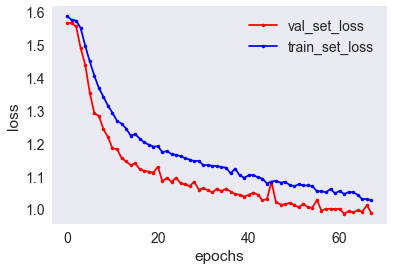

In [20]:
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))


# 2차원 그래프 그리기
plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')

# 라벨 설정
plt.legend()

# x축
plt.xlabel('epochs')
# y축
plt.ylabel('loss')

# 그래프 x y축 선 그리기
plt.grid()
plt.show()

 파일 길이 :  25


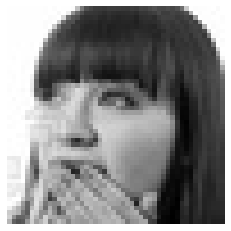

neutral : 19.6214
anger : 0.0001
surprise : 58.6181
smile : 4.6599
sad : 17.1006


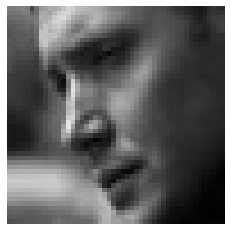

sad
자신 sad : 81.8982
smile : 4.7377
surprise : 6.9251
anger : 0.0
neutral : 6.439



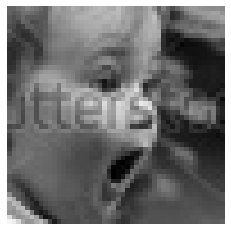

neutral : 10.8748
anger : 0.0
surprise : 68.0075
smile : 8.2414
sad : 12.8762


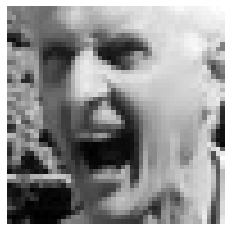

neutral : 1.9032
anger : 0.0
surprise : 0.6216
smile : 49.9705
sad : 47.5047


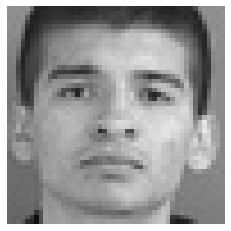

neutral.
자신 neutral : 83.9729
anger : 0.0
surprise : 2.0391
smile : 0.2382
sad : 13.7498



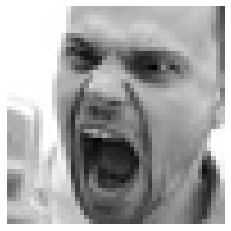

neutral : 12.8224
anger : 0.0
surprise : 3.2664
smile : 23.9424
sad : 59.9688


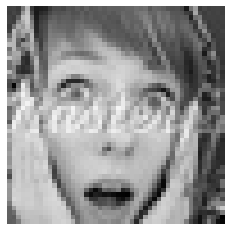

surprise
자신 surprise : 99.9948
anger : 0.0
neutral : 0.0002
smile : 0.0043
sad : 0.0007



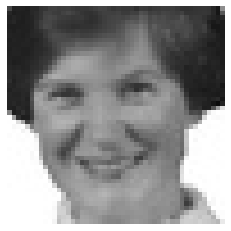

smile
자신 smile : 98.3138
surprise : 0.0315
anger : 0.0
neutral : 1.4965
sad : 0.1581



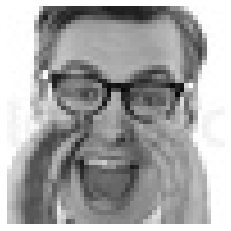

neutral : 12.0602
anger : 0.0
surprise : 13.5823
smile : 68.8382
sad : 5.5193


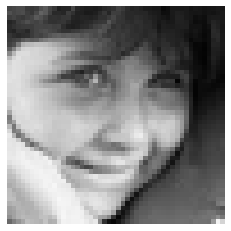

smile
자신 smile : 92.9029
surprise : 0.0103
anger : 0.0
neutral : 6.1038
sad : 0.983



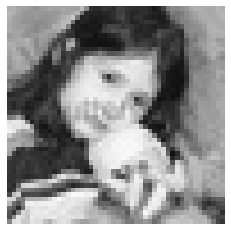

neutral : 27.5248
anger : 0.0013
surprise : 8.4229
smile : 19.2879
sad : 44.7631


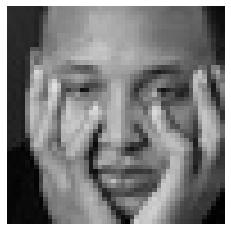

neutral : 24.5398
anger : 0.0001
surprise : 49.9078
smile : 3.0721
sad : 22.4803


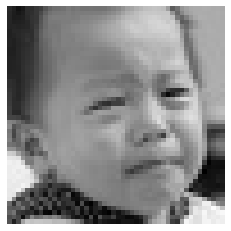

neutral : 55.5668
anger : 0.0
surprise : 0.2136
smile : 16.2582
sad : 27.9613


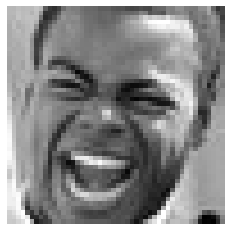

smile
자신 smile : 99.9786
surprise : 0.0001
anger : 0.0
neutral : 0.018
sad : 0.0033



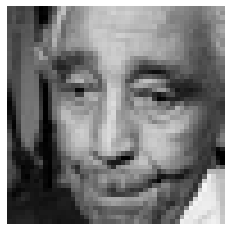

neutral : 39.9742
anger : 0.001
surprise : 8.6175
smile : 8.0089
sad : 43.3984


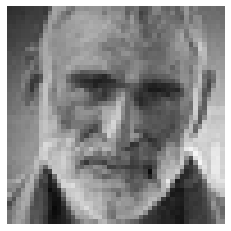

neutral : 40.3698
anger : 0.0
surprise : 0.6531
smile : 9.4278
sad : 49.5493


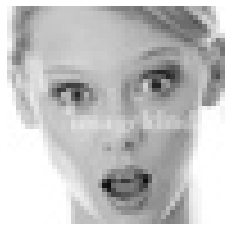

surprise
자신 surprise : 99.9506
anger : 0.0
neutral : 0.0168
smile : 0.0224
sad : 0.0103



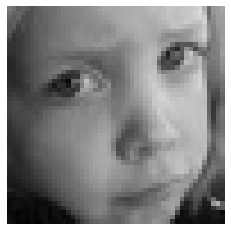

neutral : 38.7495
anger : 0.0002
surprise : 2.002
smile : 9.4099
sad : 49.8384


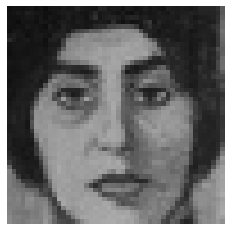

neutral : 61.8567
anger : 0.0
surprise : 4.7891
smile : 0.451
sad : 32.9032


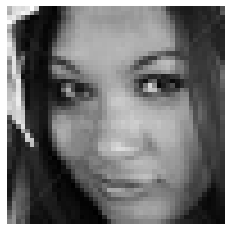

neutral : 62.7806
anger : 0.0
surprise : 3.7704
smile : 16.9841
sad : 16.465


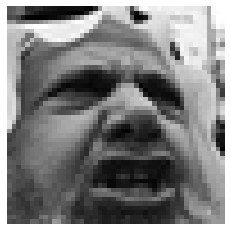

neutral : 23.3614
anger : 0.0
surprise : 0.6211
smile : 18.3198
sad : 57.6977


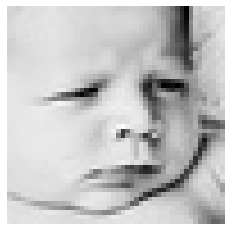

sad
자신 sad : 73.0771
smile : 0.142
surprise : 0.0868
anger : 0.0
neutral : 26.6941



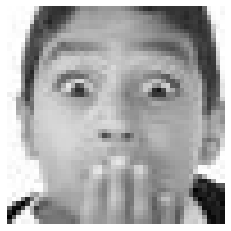

surprise
자신 surprise : 99.9598
anger : 0.0
neutral : 0.0319
smile : 0.0035
sad : 0.0048



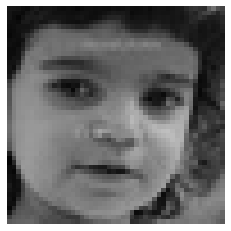

neutral : 66.4004
anger : 0.0
surprise : 2.3231
smile : 15.2418
sad : 16.0347


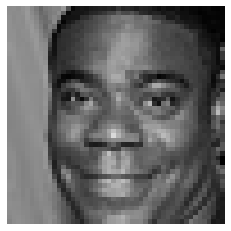

smile
자신 smile : 84.036
surprise : 1.1218
anger : 0.0
neutral : 13.5531
sad : 1.2891



In [7]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
import cv2
from matplotlib import pyplot as plt

import tensorflow as tf

seed = 5



# 자바에서나 파이썬에서나 어느 언어든 난수를 생성할 때는 무작위로 아무거나 생성하는 것이 아니기 때문에
# 랜덤을 하는 일종의 기준이 존재하는데 이것을 시드(seed)라고 하며
# 시드(난수 기준을)를 고정한 순간 다른 컴퓨터에서 돌려도 똑같은 난수가 발생한다

tf.set_random_seed(seed)
np.random.seed(seed)

image_w = 48
image_h = 48

pixels = image_h * image_w * 3

model = load_model('./model/fire_detection_images_classification.model')

caltech_dir = "dataset/test" # fire 데이터 폴더 경로
files = glob.glob(caltech_dir+"/*.jpg") # 이미지 파일 가져오기
print(" 파일 길이 : ", len(files))


j = 0
for i, f in enumerate(files): # 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    
    # 이미지 파일을 상대경로로 읽어 들인다
    # cv2.IMREAD_COLOR 이미지 파일을 Color로 읽어들입니다. 
    #  투명한 부분은 무시되며, Default값입니다.
    view_img = cv2.imread(f, cv2.IMREAD_COLOR)
    
    # 분리된 채널들은 단일 채널이므로 흑백의 색상으로만 표현된다.
    # 각 채널에서 해당되는 색을 가진 공이 다른 공보다 밝게 보인다. 
    # 해당 채널에서 강조되는 색이기 때문. 픽셀값이 255에 가까울수록 밝게 보임 
    
    
#     3개의 채널이 합쳐졌을 때 B,G,R의 값에 따라 색상을 가지는 것이지

#     single channel의 경우에는 3개의 색상 값이 아닌, 0~255 범위 내의 하나의
#     값이므로 출력하면 당연히 흑백임
    
    b, g, r = cv2.split(view_img) # img파일을 색 채널별 b,g,r로 분리
    

    
    

#     merge 함수를 사용하면 채널 이미지를 합칠 수 있습니다. 
#     해당 채널외에는 빈 이미지를 사용하면 해당 채널의 색만 강조된 이미지가 보여지며
#    해당 채널과 비슷한 픽셀값을 가진 경우에만 밝게 보이게 된다.
#    해당 사진의 특징을 추출하게 됨

#   자세한 설명 https://webnautes.tistory.com/1241

#   Red-Channel은 빨간색으로, Green-Channel은 초록색으로, Blue Channel은 파란색으로 나오게 하려면 
#   이 분리한 이미지를 다시 컬러 이미지로 변환해야 함
#   예를 들어서 Green-Channel의 경우 Red, Blue의 값이 모두 0인 3개 채널 Matrix 로 변환하면 됨

# RGB 분리 병합 설명 https://076923.github.io/posts/Python-opencv-17/

    view_img2 = cv2.merge([r,g,b])
    
    # 행과 열을 가진 행렬 형태의 2차원 데이터를 imshow 명령을 써서 이미지로 표시
    plt.imshow(view_img2) # 그냥 이미지 표시
    
    # x축 숫자표시 안나오게
    plt.xticks([])
    # y축 숫자표시 안나오게
    plt.yticks([])
    plt.show()
    
    X = []
    filenames = []
    img = Image.open(f) #이미지 열기
    img = img.convert("RGB") # 이미지 RGB로 변환
    img = img.resize((image_w, image_h))  # 이미지 축소
    data = np.asarray(img)     #이미지 행렬로 변환

    filenames.append(f) 
    X.append(data)

    X = np.array(X) 
    X = X.astype(float) / 255 #데이터 실수로 변환하고 0~1 까지의 원소로 변환
        

        
        
#      학습시킨 모델 사용하기
#      임의의 입력에 대한 모델의 출력값을 확인합니다.


    prediction = model.predict(X)


#       set_printoptions란 print 출력의 정밀도를 설정한다.
    np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

    
#    categories = ["neutral","anger","surprise","smile","sad"]

    # 모델에 입력한 값에 따른 결과 출력
    for k in prediction:
        if k[0] >= 0.7:
            print("neutral.")
            print("자신 neutral : "+str(round(k[0]*100, 4)))
            print("anger : "+str(round(k[1]*100, 4)))
            print("surprise : "+str(round(k[2]*100, 4)))
            print("smile : "+str(round(k[3]*100, 4)))
            print("sad : "+str(round(k[4]*100, 4)))
            print("")
        elif k[1] >= 0.7:
            print("anger.")
            print("자신 anger : "+str(round(k[1]*100, 4)))
            print("neutral : "+str(round(k[0]*100, 4)))
            print("surprise : "+str(round(k[2]*100, 4)))
            print("smile : "+str(round(k[3]*100, 4)))
            print("sad : "+str(round(k[4]*100, 4)))
            print("")
        elif k[2] >= 0.7:
            print("surprise")
            print("자신 surprise : "+str(round(k[2]*100, 4)))
            print("anger : "+str(round(k[1]*100, 4)))
            print("neutral : "+str(round(k[0]*100, 4)))
            print("smile : "+str(round(k[3]*100, 4)))
            print("sad : "+str(round(k[4]*100, 4)))
            print("")
        elif k[3] >= 0.7:
            print("smile")
            print("자신 smile : "+str(round(k[3]*100, 4)))
            print("surprise : "+str(round(k[2]*100, 4)))
            print("anger : "+str(round(k[1]*100, 4)))
            print("neutral : "+str(round(k[0]*100, 4)))
            print("sad : "+str(round(k[4]*100, 4)))
            print("")
        elif k[4] >= 0.7:
            print("sad")
            print("자신 sad : "+str(round(k[4]*100, 4)))
            print("smile : "+str(round(k[3]*100, 4)))
            print("surprise : "+str(round(k[2]*100, 4)))
            print("anger : "+str(round(k[1]*100, 4)))
            print("neutral : "+str(round(k[0]*100, 4)))
            print("")
        else:
            print("neutral : "+str(round(k[0]*100, 4)))
            print("anger : "+str(round(k[1]*100, 4)))
            print("surprise : "+str(round(k[2]*100, 4)))
            print("smile : "+str(round(k[3]*100, 4)))
            print("sad : "+str(round(k[4]*100, 4)))


In [8]:
import cv2
import sys
# 입력 파일 지정하기
image_file = "./test.jpg"
# 캐스케이드 파일의 경로 지정하기 --- (※1)
cascade_file = "haarcascade_frontalface_default.xml"
# 이미지 읽어 들이기 --- (※2)
image = cv2.imread(image_file)
# 그레이스케일로 변환하기
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 인식 특징 파일 읽어 들이기 --- (※3)
cascade = cv2.CascadeClassifier(cascade_file)
# 얼굴 인식 실행하기
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(150,150))
if len(face_list) > 0:
    # 인식한 부분 표시하기 --- (※4)
    print(face_list)
    color = (0, 0, 255)
    for face in face_list:
        x,y,w,h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), color, thickness=8)
    # 파일로 출력하기 --- (※5)
    cv2.imwrite("facedetect-output.PNG", image)
else:
    print("no face")

[[ 141  555  218  218]
 [1715  579  233  233]
 [ 960  364  328  328]
 [ 565  357  305  305]]


Number of faces detected: 4


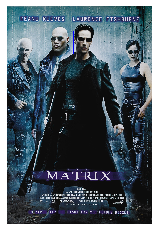

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

image = cv2.imread('./test.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

xml = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml)
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

print("Number of faces detected: " + str(len(faces)))

if len(faces):
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

cv2.imwrite("test-output.PNG", image)
        
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [44]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#전체 사진에서 얼굴 부위만 잘라 리턴
def face_extractor(img):
    global count
    
    #흑백처리 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #얼굴 찾기 
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    #찾은 얼굴이 없으면 None으로 리턴 
    if faces is():
        return None
    #얼굴들이 있으면 
    for(x,y,w,h) in faces:
        #해당 얼굴 크기만큼 cropped_face에 잘라 넣기 
        #근데... 얼굴이 2개 이상 감지되면??
        #가장 마지막의 얼굴만 남을 듯
        cropped_face = img[y:y+h, x:x+w]
        face = cv2.resize(cropped_face,(200,200))
        cv2.imwrite('facetest/face_test'+str(count)+'.jpg',face)
        count+=1
    #cropped_face 리턴 


In [26]:
image = cv2.imread('./test.jpg')
face_extractor(image)

array([[[162, 146, 110],
        [161, 146, 107],
        [155, 139,  96],
        ...,
        [184, 174, 156],
        [185, 174, 152],
        [181, 170, 148]],

       [[170, 155, 122],
        [170, 154, 117],
        [163, 147, 105],
        ...,
        [183, 174, 154],
        [183, 172, 150],
        [180, 169, 147]],

       [[172, 157, 124],
        [171, 157, 121],
        [166, 151, 112],
        ...,
        [182, 175, 156],
        [180, 171, 151],
        [179, 170, 150]],

       ...,

       [[227, 215, 209],
        [224, 214, 204],
        [229, 220, 207],
        ...,
        [221, 210, 202],
        [222, 211, 203],
        [222, 211, 203]],

       [[233, 221, 211],
        [240, 229, 215],
        [229, 217, 199],
        ...,
        [222, 211, 203],
        [222, 211, 203],
        [222, 211, 203]],

       [[232, 222, 205],
        [217, 205, 187],
        [150, 139, 119],
        ...,
        [221, 210, 202],
        [222, 211, 203],
        [222, 211, 203]]

In [45]:
from PIL import Image # Python Image Library  (파이썬을 이용해서 쉽게 이미지 프로세싱을 할 수 있게 주는 라이브러리)
import os # OS는 operating system의 약자로, 운영체제를 의미 파이썬에 기본적으로 내장된 모듈의 이름
           # os.path 모듈은 파일명과 파일경로에 대한 유용한 함수들을 많이 제공함
            # 경로의 이미지를 모두 뽑아내기 위한 os.listdir 사용예제
        
import glob # 재귀적으로 현재 폴더의 모든 하위폴더까지 탐색하여 확장자가 jpg인 파일을 출력한다.
            # 특정 파일만 출력하기
    
import numpy as np # 계산을 위해 행렬과 같은 다양한 수학 도구를 사용하기 위한 라이브러리


from sklearn.model_selection import train_test_split


global count
count=0

caltech_dir = "nota/train/img" # fire 데이터 폴더 경로
files = glob.glob(caltech_dir+"/*.jpg") # 이미지 파일 가져오기

for i, f in enumerate(files): # 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    
    view_img = cv2.imread(f, cv2.COLOR_BGR2GRAY)
    face_extractor(image)

    
print(" 파일 길이 : ", len(files))


 파일 길이 :  1688


In [ ]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#전체 사진에서 얼굴 부위만 잘라 리턴
def face_extractor(img):
    global count
    
    #흑백처리 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #얼굴 찾기 
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    #찾은 얼굴이 없으면 None으로 리턴 
    if faces is():
        return None
    #얼굴들이 있으면 
    for(x,y,w,h) in faces:
        #해당 얼굴 크기만큼 cropped_face에 잘라 넣기 
        #근데... 얼굴이 2개 이상 감지되면??
        #가장 마지막의 얼굴만 남을 듯
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(frame, label, (x, y - 20), cv2.FONT_ITALIC, 1, color, 1)
        
        
        
        cv2.imwrite('facetest/face_test'+str(count)+'.jpg',face)
        count+=1
    #cropped_face 리턴 


In [61]:
caltech_dir = "nota/train/test" # fire 데이터 폴더 경로
files = glob.glob(caltech_dir+"/*.jpg") # 이미지 파일 가져오기
X = []

for i, f in enumerate(files): # 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    view_img = cv2.imread(f, cv2.IMREAD_COLOR)
    view_img = cv2.resize(view_img,(200,200))
    b, g, r = cv2.split(view_img) # img파일을 색 채널별 b,g,r로 분리
    view_img2 = cv2.merge([r,g,b])
    view_img2 = np.asarray(view_img2)
    print(view_img2)
    print(type(view_img2))

[[[ 69  87  99]
  [ 70  88 100]
  [ 70  88 100]
  ...
  [159 178 182]
  [159 178 182]
  [159 178 182]]

 [[ 69  87  99]
  [ 70  88 100]
  [ 70  88 100]
  ...
  [159 178 182]
  [159 178 182]
  [159 178 182]]

 [[ 69  87  99]
  [ 70  88 100]
  [ 70  88 100]
  ...
  [159 178 182]
  [159 178 182]
  [159 178 182]]

 ...

 [[ 30  44  45]
  [ 30  44  45]
  [ 30  44  45]
  ...
  [109 126 110]
  [109 126 110]
  [109 126 110]]

 [[ 30  44  45]
  [ 30  44  45]
  [ 30  44  45]
  ...
  [109 126 110]
  [109 126 110]
  [109 126 110]]

 [[ 30  44  45]
  [ 30  44  45]
  [ 30  44  45]
  ...
  [109 126 110]
  [109 126 110]
  [109 126 110]]]
<class 'numpy.ndarray'>
[[[161 120  98]
  [161 120  98]
  [162 121  99]
  ...
  [243 117  59]
  [243 116  61]
  [244 117  62]]

 [[162 121  99]
  [160 119  97]
  [160 119  97]
  ...
  [243 117  59]
  [243 116  61]
  [244 117  62]]

 [[162 122  97]
  [160 120  95]
  [160 118  94]
  ...
  [242 116  58]
  [242 117  61]
  [243 118  62]]

 ...

 [[242 118  58]
  [242 118  

In [62]:
caltech_dir = "nota/train/test" # fire 데이터 폴더 경로
files = glob.glob(caltech_dir+"/*.jpg") # 이미지 파일 가져오기

for i, f in enumerate(files): # 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    img = Image.open(f) # f는 이미지의 경로를 찾아가서 이미지 열기
    img = img.convert("RGB") #RGB 모드로 변환
    data = np.asarray(img) # 입력 데이터를 ndarray로 변환하나 이미 ndarray일 경우에는 새로 메모리에 ndarray가 생성되지 않음
    print(data)
    print(type(data))

[[[ 69  87  99]
  [ 70  88 100]
  [ 70  88 100]
  ...
  [159 178 182]
  [159 178 182]
  [159 178 182]]

 [[ 69  87  99]
  [ 70  88 100]
  [ 70  88 100]
  ...
  [159 178 182]
  [159 178 182]
  [159 178 182]]

 [[ 69  87  99]
  [ 70  88 100]
  [ 70  88 100]
  ...
  [159 178 182]
  [159 178 182]
  [159 178 182]]

 ...

 [[ 30  44  45]
  [ 30  44  45]
  [ 30  44  45]
  ...
  [109 126 110]
  [109 126 110]
  [109 126 110]]

 [[ 30  44  45]
  [ 30  44  45]
  [ 30  44  45]
  ...
  [109 126 110]
  [109 126 110]
  [109 126 110]]

 [[ 30  44  45]
  [ 30  44  45]
  [ 30  44  45]
  ...
  [109 126 110]
  [109 126 110]
  [109 126 110]]]
<class 'numpy.ndarray'>
[[[159 121  98]
  [161 120  98]
  [162 121  99]
  ...
  [243 116  61]
  [243 116  61]
  [243 118  60]]

 [[162 121  99]
  [160 119  97]
  [160 119  97]
  ...
  [243 116  61]
  [243 116  61]
  [243 118  62]]

 [[162 122  97]
  [160 120  95]
  [159 118  96]
  ...
  [242 115  60]
  [243 116  61]
  [243 118  62]]

 ...

 [[242 118  58]
  [242 118  